In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('../datasets/heart.csv')
data.shape

(299, 14)

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
all_columns = data.columns
category_columns = ['ca', 'cp', 'restecg', 'slope', 'thal']
binary_columns = ['sex', 'fbs', 'exang', 'target']
scalable_columns = set(all_columns) - set(binary_columns) - set(category_columns)
scalable_columns = list(scalable_columns)
scalable_columns

['trestbps', 'age', 'thalach', 'chol', 'oldpeak']

In [6]:
from sklearn.preprocessing import minmax_scale


data[scalable_columns] = minmax_scale(data[scalable_columns])
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1


In [7]:
# let's convert categorical data into dummies

ca_dummy = pd.get_dummies(data['ca'], prefix="ca", drop_first=False)
cp_dummy = pd.get_dummies(data['cp'], prefix="cp", drop_first=False)
restecg_dummy = pd.get_dummies(data['restecg'], prefix="restecg", drop_first=False)
slope_dummy = pd.get_dummies(data['slope'], prefix="slope", drop_first=False)
thal_dummy = pd.get_dummies(data['thal'], prefix="thal", drop_first=False)

In [8]:
# let's see an examplo of what the dummy transformation do
slope_dummy.sample(5)

,slope_0,slope_1,slope_2
72,0,0,1
268,0,1,0
264,0,1,0
160,1,0,0
286,0,0,1


In [9]:
# and now let's join the dummies we created before to our dataframe
dummies = [ca_dummy, cp_dummy, restecg_dummy, slope_dummy, thal_dummy]
for i in dummies:
    data = data.join(i)

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ca_0,ca_1,ca_2,ca_3,ca_4,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [11]:
# as we have added the dummies, we must remove the original categorical columns, let's print just one line to assure everything is fine
data_no_category_col = data.drop(category_columns, axis=1)
data_no_category_col.head(1)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,ca_0,ca_1,ca_2,ca_3,ca_4,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.708333,1,0.481132,0.244292,1,0.603053,0,0.370968,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0


# Let's run our predictions with this new fancy dataset!

In [12]:
X = data_no_category_col.drop(['target'], axis=1)
y = data_no_category_col.target

In [14]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=1)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

In [17]:
# here we go, first prediction! and after we gonna see the confusion matrix and the different scores
y_pred = clf.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('The confusion matrix : \n', confusion_matrix(y_test, y_pred))
print('The accuracy score : ', accuracy_score(y_test, y_pred))
print('The precission score : ', precision_score(y_test, y_pred))
print('The recall score : ', recall_score(y_test, y_pred))
print('The f1 score : ', f1_score(y_test, y_pred))

The confusion matrix : 
 [[22  7]
 [ 4 27]]
The accuracy score :  0.8166666666666667
The precission score :  0.7941176470588235
The recall score :  0.8709677419354839
The f1 score :  0.8307692307692308


Text(0.5, 257.44, 'Predicted label')

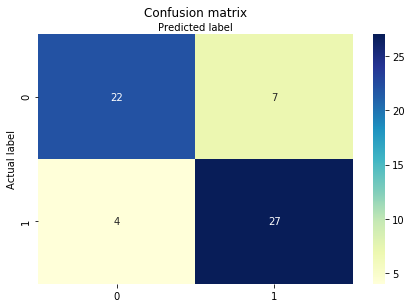

In [19]:
# although we already have the confusion matrix, we can generate it within a heat map and in a format that we can export for future use
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Random Forest

the training scores:  [0.5323512896190836, 0.7299305655104948, 0.8744745483246172, 0.9209284470586241, 0.926896102944795]
the testing scores:   [0.4755798853336778, 0.740053427304942, 0.8797751377402622, 0.9079354484934563, 0.9129085700160673]


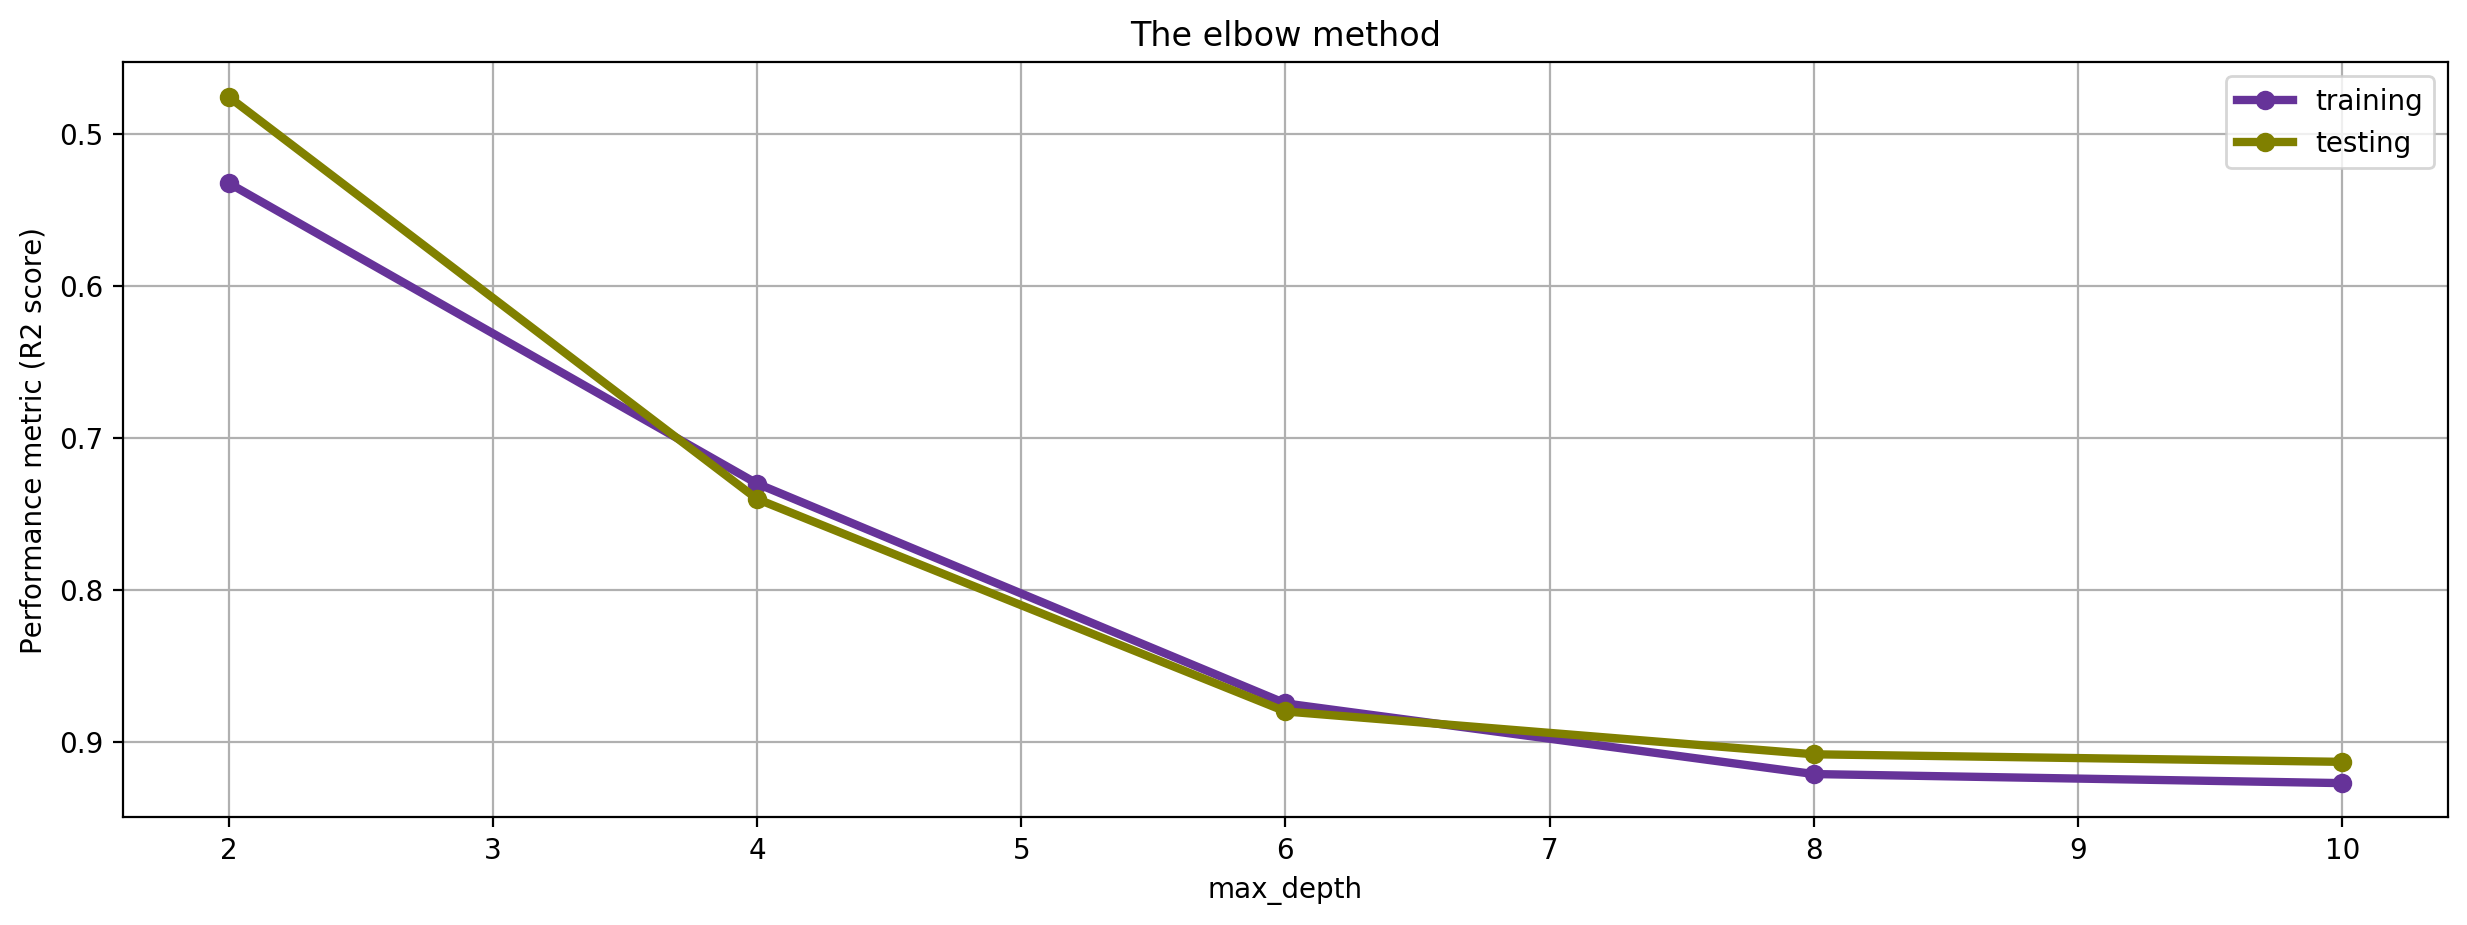

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

max_depth =  [2, 4, 6, 8, 10]
training = []
testing = []

for i in max_depth:
    regr = RandomForestRegressor(max_depth=i, random_state=1).fit(X, y)
    y_predict_train = regr.predict(X_train)
    y_predict_test = regr.predict(X_test)
    training.append(r2_score(y_train, y_predict_train))
    testing.append(r2_score(y_test, y_predict_test))
    
print('the training scores: ',training)    
print('the testing scores:  ',testing)   

#Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.figure(figsize= (15,5), dpi=200)
plt.plot( max_depth, training, 'bo-', color='rebeccapurple', lw=3, label='training')
plt.plot( max_depth, testing, 'bo-', color='olive', lw=3, label='testing')
plt.grid()
plt.title('The elbow method')
plt.xlabel('max_depth')
plt.ylabel('Performance metric (R2 score)') 
plt.legend()
plt.gca().invert_yaxis()
plt.show()

# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

y_pred_knn_3 = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn_3)
print('The confusion matrix : \n', cm)

accuracy = accuracy_score(y_test, y_pred_knn_3)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

The confusion matrix : 
 [[21  8]
 [ 3 28]]
Accuracy of our model is equal 81.67 %.


In [28]:
# Instantiating learning model (k = 5) increasing the k
classifier = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

y_pred_knn_5 = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn_5)
print('The confusion matrix : \n', cm)

accuracy = accuracy_score(y_test, y_pred_knn_5)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

The confusion matrix : 
 [[21  8]
 [ 3 28]]
Accuracy of our model is equal 81.67 %.


In [29]:
# Instantiating learning model (k = 7) increasing the k
classifier = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

y_pred_knn_7 = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_knn_7)
print('The confusion matrix : \n', cm)

accuracy = accuracy_score(y_test, y_pred_knn_7)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

The confusion matrix : 
 [[20  9]
 [ 3 28]]
Accuracy of our model is equal 80.0 %.


# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)

In [37]:
decision_tree_pred = decision_tree.predict(X_test)

In [38]:
print('The confusion matrix : \n', confusion_matrix(y_test, decision_tree_pred))
print('The accuracy score : ', accuracy_score(y_test, decision_tree_pred))
print('The precission score : ', precision_score(y_test, decision_tree_pred))
print('The recall score : ', recall_score(y_test, decision_tree_pred))
print('The f1 score : ', f1_score(y_test, decision_tree_pred))

The confusion matrix : 
 [[17 12]
 [12 19]]
The accuracy score :  0.6
The precission score :  0.6129032258064516
The recall score :  0.6129032258064516
The f1 score :  0.6129032258064516


# SVM

In [33]:
from sklearn.svm import SVC
svm = SVC(kernel= 'rbf').fit(X_train, y_train)

In [34]:
svm_pred = svm.predict(X_test)

In [35]:
print('The confusion matrix : \n', confusion_matrix(y_test, svm_pred))
print('The accuracy score : ', accuracy_score(y_test, svm_pred))
print('The precission score : ', precision_score(y_test, svm_pred))
print('The recall score : ', recall_score(y_test, svm_pred))
print('The f1 score : ', f1_score(y_test, svm_pred))

The confusion matrix : 
 [[22  7]
 [ 3 28]]
The accuracy score :  0.8333333333333334
The precission score :  0.8
The recall score :  0.9032258064516129
The f1 score :  0.8484848484848486


# Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

In [40]:
nb_pred = nb.predict(X_test)

In [41]:
print('The confusion matrix : \n', confusion_matrix(y_test, nb_pred))
print('The accuracy score : ', accuracy_score(y_test, nb_pred))
print('The precission score : ', precision_score(y_test, nb_pred))
print('The recall score : ', recall_score(y_test, nb_pred))
print('The f1 score : ', f1_score(y_test, nb_pred))

The confusion matrix : 
 [[26  3]
 [17 14]]
The accuracy score :  0.6666666666666666
The precission score :  0.8235294117647058
The recall score :  0.45161290322580644
The f1 score :  0.5833333333333333
